# Qiskit VQE Tutorial
Full tutorial using Qiskit VQE class following
https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/algorithms/02_vqe_advanced_options.ipynb

In [1]:
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import NELDER_MEAD, ADAM, GradientDescentState
from qiskit_nature.circuit.library.ansatzes import UCC
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.utils import algorithm_globals
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
import datetime


from qiskit import QuantumCircuit

from src.hamiltonian.FermionicHamiltonian import FermionicHamiltonian
from src.molecule.BeH2 import BeH2

In [2]:
molecule = BeH2(14, 6)

In [3]:
hamiltonian = FermionicHamiltonian(molecule=molecule)
op = hamiltonian.get_hamiltonian_op()

In [49]:
print(len(op))

In [4]:
# create estimator, optimizer, converter, ansatz
estimator = Estimator()
# optimizer definition
#optimizer = NELDER_MEAD(maxiter=5000)
#optimizer = GradientDescent(maxiter=200)
optimizer = BOBYQA(maxiter=100, max_fev =100)
# use UCC Ansatz
converter = QubitConverter(mapper=JordanWignerMapper(), two_qubit_reduction=True)
#ansatz = UCC(excitations='st')

MissingOptionalLibraryError: "The 'scikit-quant' library is required to use 'BOBYQA'. You can install it with 'pip install scikit-quant'."

In [53]:
ucc_ansatz = UCC(qubit_converter=converter, num_spin_orbitals=14, num_particles=(0,6), excitations='sd', alpha_spin=True, beta_spin=True, max_spin_excitation=1, generalized=True, preserve_spin=True, reps=5)

In [51]:
ucc_ansatz.num_qubits
# has to be equal to the ones of the hamiltonian

Optimizer: NELDER_MEAD        

In [52]:
ucc_ansatz_h2 = UCC(qubit_converter=converter, num_spin_orbitals=4, num_particles=(0,2), excitations='sd', alpha_spin=True, beta_spin=True, max_spin_excitation=1, generalized=True, preserve_spin=True, reps=5)

In [54]:
print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
algorithm_globals.random_seed = 50
# use ansatz TwoLocal
#ansatz2 = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
counts = []
values = []

Starting calculation at: 2023-05-03 22:27:11.274019
Iteration done at 2023-05-03 22:27:12.432720
Iteration done at 2023-05-03 22:27:13.552149
Iteration done at 2023-05-03 22:27:14.669926
Iteration done at 2023-05-03 22:27:15.787309
Iteration done at 2023-05-03 22:27:16.906121
Iteration done at 2023-05-03 22:27:18.022914
Iteration done at 2023-05-03 22:27:19.142395
Iteration done at 2023-05-03 22:27:20.258871
Iteration done at 2023-05-03 22:27:21.380226
Iteration done at 2023-05-03 22:27:22.499549
Iteration done at 2023-05-03 22:27:23.614220
Iteration done at 2023-05-03 22:27:24.735867
Iteration done at 2023-05-03 22:27:25.856532
Iteration done at 2023-05-03 22:27:26.970733
Iteration done at 2023-05-03 22:27:28.091847
Iteration done at 2023-05-03 22:27:29.206650
Iteration done at 2023-05-03 22:27:30.328603
Iteration done at 2023-05-03 22:27:31.446232
Iteration done at 2023-05-03 22:27:32.625581
Iteration done at 2023-05-03 22:27:33.741205
Iteration done at 2023-05-03 22:27:34.860846
Ite

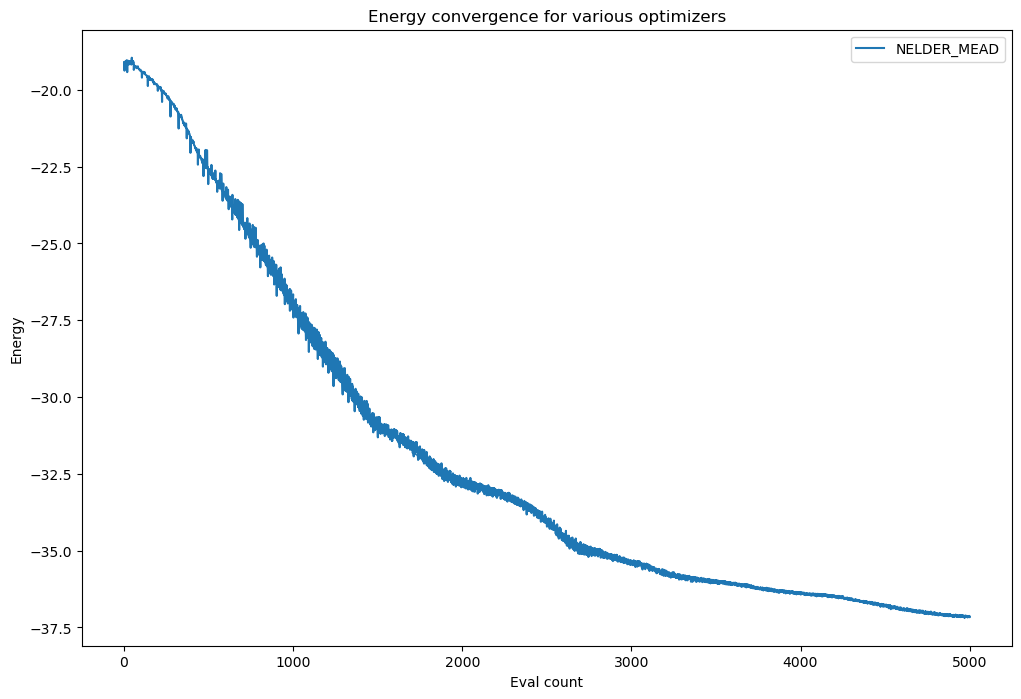

In [55]:
def store_intermediate_result(eval_count, parameters, mean, std):
    time = datetime.datetime.now()
    print(f"Iteration done at {time}")
    counts.append(eval_count)
    values.append(mean)

In [56]:
# TwoLocal Ansatz
ansatz = TwoLocal(num_qubits=molecule.num_orbitals, rotation_blocks="ry", entanglement_blocks="cz")
optimizer.setting

Reference value: -46.29679


In [11]:
# Use VQE with estimator, ansatz, optimizer
vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
# invoke computation on the operator
time = datetime.datetime.now()
print(f"Starting calculation at: {time}")
result = vqe.compute_minimum_eigenvalue(operator=op)
time = datetime.datetime.now()
print(f"Ended calculation at: {time}")


converge_counts = np.asarray(counts)
converge_vals = np.asarray(values)

print("\rOptimization complete");

Starting calculation at: 2023-05-02 17:10:16.591165
Iteration done at 2023-05-02 17:10:18.063303
Iteration done at 2023-05-02 17:10:19.293850
Iteration done at 2023-05-02 17:10:20.534275
Iteration done at 2023-05-02 17:10:21.734915
Iteration done at 2023-05-02 17:10:22.955736
Iteration done at 2023-05-02 17:10:24.542262
Iteration done at 2023-05-02 17:10:25.842944
Iteration done at 2023-05-02 17:10:27.187231
Iteration done at 2023-05-02 17:10:28.835549
Iteration done at 2023-05-02 17:10:30.110988
Iteration done at 2023-05-02 17:10:31.420936
Iteration done at 2023-05-02 17:10:32.638992
Iteration done at 2023-05-02 17:10:33.920705
Iteration done at 2023-05-02 17:10:35.353658
Iteration done at 2023-05-02 17:10:36.692399
Iteration done at 2023-05-02 17:10:37.927973
Iteration done at 2023-05-02 17:10:39.191978
Iteration done at 2023-05-02 17:10:40.541000
Iteration done at 2023-05-02 17:10:41.754877
Iteration done at 2023-05-02 17:10:43.018027
Iteration done at 2023-05-02 17:10:44.263396
Ite

KeyboardInterrupt: 

In [ ]:
# Outputting the optimization process
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
pylab.plot(converge_counts, converge_vals, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [ ]:
# Analytic solution
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=op)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")